# Explicación concepto de convolución, stride y padding

---



**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** 2023

**Versión:** 1.0  

**Fecha de Actualziación:** Abril 2025

**Versión:** 1.1  


---

## Descripción

Este notebook explica los conceptos de convolución, stride y padding.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- tensorflow (2.18.0)
- matplotlib (3.10.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

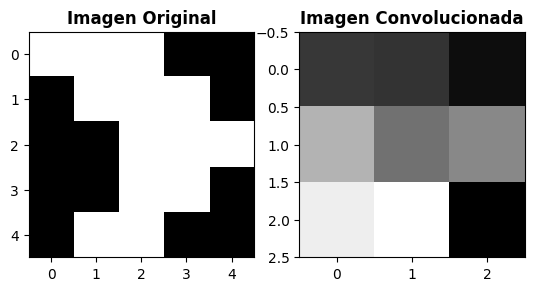

In [ ]:
# Cargar una imagen en escala de grises de ejemplo
imagen = np.array([[1, 1, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 1, 1],
                   [0, 0, 1, 1, 0],
                   [0, 1, 1, 0, 0]], dtype=np.float32)

# Añadir una dimensión de canal para que coincida con la forma de entrada de la capa Conv2D
imagen = imagen.reshape(1, 5, 5, 1)

# Definir una capa de convolución con un kernel simple
capa_convolucion = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, padding='valid')

# Aplicar la capa de convolución a la imagen
resultado_convolucion = capa_convolucion(imagen)

# Obtener el resultado como un array de NumPy
resultado = resultado_convolucion.numpy()

# Mostrar la imagen original y la imagen resultante de la convolución
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(imagen[0, :, :, 0], cmap='gray')
plt.title('Imagen Original', fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
plt.imshow(resultado[0, :, :, 0], cmap='gray')
plt.title('Imagen Convolucionada', fontsize=12, fontweight="bold")
plt.show()



**La imagen inicial (una matriz de números entre 0 y 1).**

+ 1 significa zonas claras.

+ 0 significa zonas oscuras.

**Aplica un filtro (kernel)**

+ El filtro (o kernel) es como una pequeña ventana que va recorriendo la imagen.

+ En cada posición, el filtro multiplica los valores de la imagen por los valores del kernel y suma el resultado.

+ Esto genera un nuevo valor para esa posición en la imagen resultante.

**¿Por qué cambian las tonalidades?**

+ Donde el filtro encuentra patrones fuertes (por ejemplo, cambios de 0 a 1 o de 1 a 0), los valores sumados son más grandes o más pequeños.

+ Eso genera zonas más claras o más oscuras en la nueva imagen.

Si el filtro "detecta" que hay borde, cambio o textura, ese lugar se verá más brillante o más oscuro en la imagen convolucionada.

**¿Cómo se interpretan los cambos de tono?**

+ En la imagen convolucionada, las zonas muy claras: es porque el filtro encontró **un cambio fuerte**. Un ejemplo de cambio fuerte es el borde de una figura.

+ En la imagen convolucionada, las zonas oscuras: no hubo cambios importantes en la región.

**Consideraciones importantes**

+ El filtro que se creó se inicializa aleatoriamente (porque no se entrega un kernel específico).

+ Consecuencia de lo anterior, el tipo de cambio de tonalidades puede parecer un poco aleatorio.


In [ ]:
capa_convolucion.kernel_initializer.distribution

'uniform'

In [ ]:
imagen.shape

(1, 5, 5, 1)

In [ ]:
resultado.shape

(1, 3, 3, 1)

# Cambio en el valor de stride

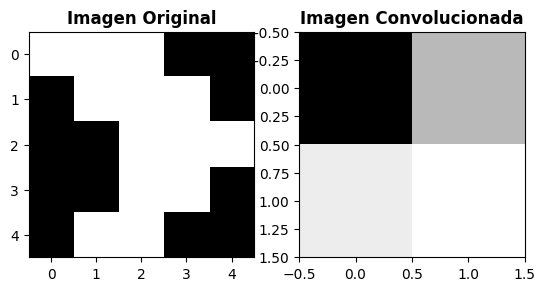

In [ ]:
# Definir una capa de convolución con un kernel simple
capa_convolucion = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=2, padding='valid')

# Aplicar la capa de convolución a la imagen
resultado_convolucion = capa_convolucion(imagen)

# Obtener el resultado como un array de NumPy
resultado = resultado_convolucion.numpy()

# Mostrar la imagen original y la imagen resultante de la convolución
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(imagen[0, :, :, 0], cmap='gray')
plt.title('Imagen Original', fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
plt.imshow(resultado[0, :, :, 0], cmap='gray')
plt.title('Imagen Convolucionada', fontsize=12, fontweight="bold")
plt.show()


In [ ]:
resultado.shape

(1, 2, 2, 1)

# Parámetro *padding*

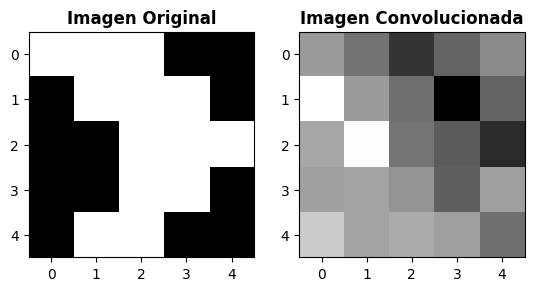

In [ ]:
# Definir una capa de convolución con un kernel simple
capa_convolucion = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=1, padding='same')

# Aplicar la capa de convolución a la imagen
resultado_convolucion = capa_convolucion(imagen)

# Obtener el resultado como un array de NumPy
resultado = resultado_convolucion.numpy()

# Mostrar la imagen original y la imagen resultante de la convolución
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(imagen[0, :, :, 0], cmap='gray')
plt.title('Imagen Original', fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
plt.imshow(resultado[0, :, :, 0], cmap='gray')
plt.title('Imagen Convolucionada', fontsize=12, fontweight="bold")
plt.show()


In [ ]:
resultado.shape

(1, 5, 5, 1)

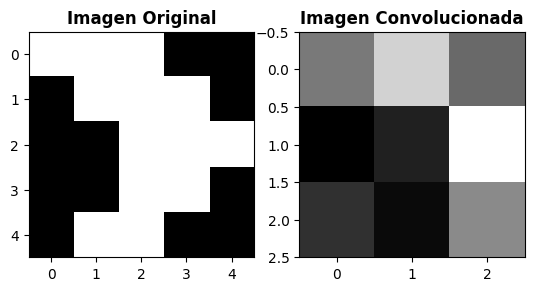

In [ ]:
# Definir una capa de convolución con un kernel simple
capa_convolucion = tf.keras.layers.Conv2D(filters=1, kernel_size=3, strides=2, padding='same')

# Aplicar la capa de convolución a la imagen
resultado_convolucion = capa_convolucion(imagen)

# Obtener el resultado como un array de NumPy
resultado = resultado_convolucion.numpy()

# Mostrar la imagen original y la imagen resultante de la convolución
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(imagen[0, :, :, 0], cmap='gray')
plt.title('Imagen Original', fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
plt.imshow(resultado[0, :, :, 0], cmap='gray')
plt.title('Imagen Convolucionada', fontsize=12, fontweight="bold")
plt.show()

In [ ]:
resultado.shape

(1, 3, 3, 1)

**✅ ¿Qué cambia con el parámetro padding?**

*padding = 'valid'*
+ **No agrega ceros** alrededor de la imagen. Sólo se computan posiciones donde el filtro cabe completamente.
+ El resultado es que la imagen **disminuye su tamaño**.

*padding = 'same'*
+ **Agrega ceros** alrededor de la imagen (bordes). De esta forma se puede aplicar el filtro en todos los lados, incluso en los bordes.
+ El resultado es que la imagen **mantiene su tamaño original**.

Si se tiene una imagen de 5x5:

+ Con *padding='valid'* y filtro 3x3, el resultado será de tamaño (5-3+1) x (5-3+1) = 3x3.

+ Con *padding='same'* y filtro 3x3, el resultado será 5x5 igual que la original, porque se agregan ceros extra para "acomodar" el filtro en las orillas.

# Uso de kernel específico

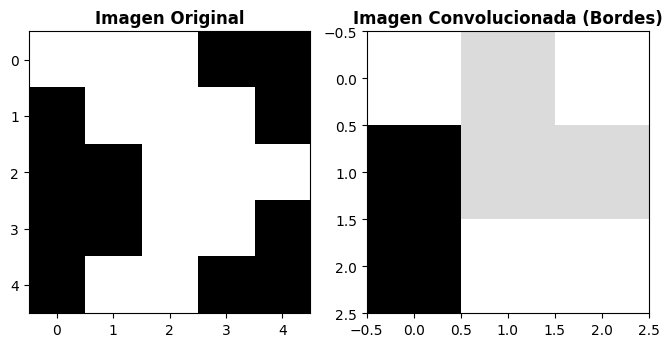

In [ ]:
# Añadir dimensión de batch y canal
imagen = imagen.reshape(1, 5, 5, 1)

# Definir manualmente un kernel (filtro de detección de bordes)
kernel = np.array([[[-1], [-1], [-1]],
                   [[-1], [8], [-1]],
                   [[-1], [-1], [-1]]], dtype=np.float32)

# Ajustar dimensiones: alto, ancho, canales de entrada, canales de salida
kernel = kernel.reshape(3, 3, 1, 1)

capa_convolucion = tf.keras.layers.Conv2D(filters=1, kernel_initializer=kernel, kernel_size= 3,
                                          strides=1, padding='valid')
# Aplicar convolución manualmente
resultado_convolucion = capa_convolucion(imagen)

# Convertir a numpy
resultado = resultado_convolucion.numpy()

# Mostrar imagen original y convolucionada
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(imagen[0, :, :, 0], cmap='gray')
plt.title('Imagen Original', fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
plt.imshow(resultado[0, :, :, 0], cmap='gray')
plt.title('Imagen Convolucionada (Bordes)', fontsize=12, fontweight="bold")
plt.show()

---
✅**Comentarios**

---
+ Este kernel **resalta los bordes**: zonas donde los ixeles cambian de valor
+ Si el centro es muy distinto de sus vecinos entonces el resultado será un número más alto (zona clara en la convolución).
+ Si, por el contrario, el centro es parecido a sus vecinos entonces el resultado será más pequeño o negativo (zona oscura)

🧠 **¿Qué significa el 8?**

+ No es completamente arbitrario, pero sí es elegido a propósito para lograr cierto efecto.

+ El 8 en el centro se pone para darle más peso al píxel central comparado con sus vecinos.

Como todos los vecinos tienen peso -1, y el centro tiene 8, lo que haces es:

+ Si el centro es muy diferente de sus vecinos, el resultado será alto.

+ Si el centro y sus vecinos son parecidos, el resultado será bajo o cercano a cero.

Esta es una idea típica de un detector de bordes, llamada **filtro Laplaciano**.

Matemáticamente:

$nuevo\ valor = (8\times pixel_{central} - (\sum_{i=1}^{8}pixel_i\ vecino))$

+ Si el píxel central es similar a sus vecinos, los valores se cancelan.
+ Si es muy distinto (por ejemplo, pasa de blanco a negro), el resultado es grande, detectando un borde.

**El número 8 tiene sentido porque:**

+ Son 8 vecinos.

+ Cada vecino aporta "-1" → en total "-8".

+ Para "balancearlo", al centro se le pone "8".

+ Así el filtro está "centrado" (si todo es uniforme, el resultado es cero).




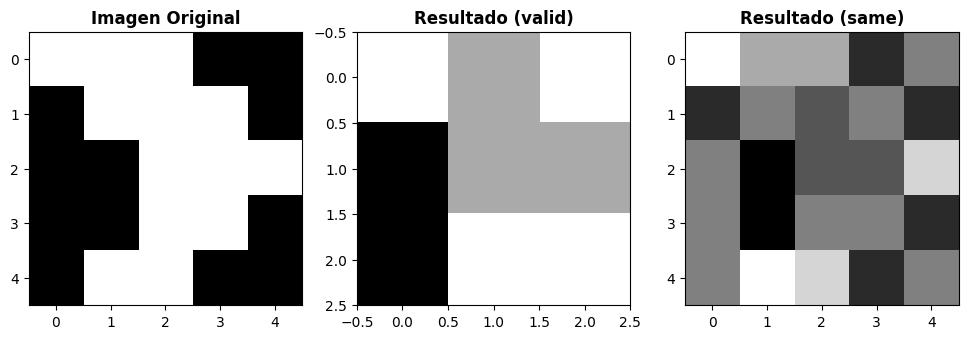

In [ ]:
# Define el kernel pero ahora con 4 en el centro
kernel = np.array([[[-1], [-1], [-1]],
                   [[-1], [ 4], [-1]],
                   [[-1], [-1], [-1]]], dtype=np.float32)

kernel = kernel.reshape(3, 3, 1, 1)

# Convolución con padding 'valid' (sin bordes)

capa_convolucion_valid = tf.keras.layers.Conv2D(filters=1, kernel_initializer=kernel, kernel_size= 3,
                                          strides=1, padding='valid')

capa_convolucion_same = tf.keras.layers.Conv2D(filters=1, kernel_initializer=kernel, kernel_size= 3,
                                          strides=1, padding='same')

# Aplicar convolución manualmente
resultado_valid = capa_convolucion_valid(imagen)
resultado_same = capa_convolucion_same(imagen)
#resultado_valid = tf.nn.conv2d(imagen, kernel, strides=1, padding='VALID')

# Convolución con padding 'SAME' (manteniendo el tamaño)
#resultado_same = tf.nn.conv2d(imagen, kernel, strides=1, padding='SAME')

# Mostrar imágenes
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(imagen[0, :, :, 0], cmap='gray')
plt.title('Imagen Original', fontsize=12, fontweight="bold")

plt.subplot(1, 3, 2)
plt.imshow(resultado_valid[0, :, :, 0], cmap='gray')
plt.title('Resultado (valid)', fontsize=12, fontweight="bold")

plt.subplot(1, 3, 3)
plt.imshow(resultado_same[0, :, :, 0], cmap='gray')
plt.title('Resultado (same)', fontsize=12, fontweight="bold")

plt.show()


✅ **¿Qué se observa al cambiar el 8 por 4?**

+ Como el centro tiene menos peso, el filtro es menos agresivo detectando los bordes.

+ En el resultado, se observa que los bordes no se resaltan tanto como con 8.

+ Menos diferencia entre el píxel central y los vecinos genera tonalidades más suaves.



# **🔖 Otros kernel**

## Detección de bordes

### Sobel (horizontal)

Detecta bordes en dirección horizontal



```
sobel_horizontal = np.array([
    [[-1], [0], [1]],
    [[-2], [0], [2]],
    [[-1], [0], [1]]
], dtype=np.float32)
```



### Sobel (vertical)

Detecta bordes en dirección vertical



```
sobel_vertical = np.array([
    [[-1], [-2], [-1]],
    [[0], [0], [0]],
    [[1], [2], [1]]
], dtype=np.float32)
```



## Kernels para suavizado





### Promedio simple (Box Blur)

Difumina suavemente la imagen, quitando ruido.


```
box_blur = np.array([
    [[1/9], [1/9], [1/9]],
    [[1/9], [1/9], [1/9]],
    [[1/9], [1/9], [1/9]]
], dtype=np.float32)

```



### Gaussiano (desenfoque más natural)

Reduce ruido sin perder tanto detalle


```
gaussian_blur = np.array([
    [[1/16], [2/16], [1/16]],
    [[2/16], [4/16], [2/16]],
    [[1/16], [2/16], [1/16]]
], dtype=np.float32)

```



## Kernel para *realce*

### Afilado

Resalta detalles en la imagen



```
sharpen = np.array([
    [[0], [-1], [0]],
    [[-1], [5], [-1]],
    [[0], [-1], [0]]
], dtype=np.float32)

```



## Kernel para relieve

### Emboss

Crea efecto de relieve (imagen 3D)



```
emboss = np.array([
    [[-2], [-1], [0]],
    [[-1], [1], [1]],
    [[0], [1], [2]]
], dtype=np.float32)

```

